In [8]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

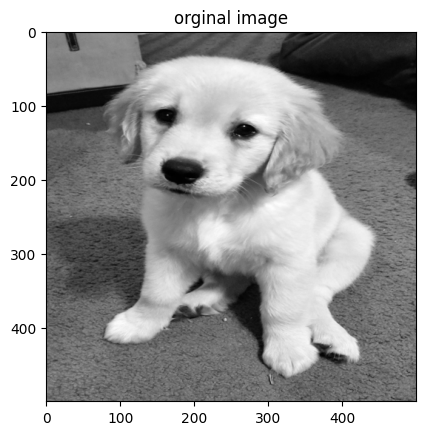

In [2]:
img = Image.open("cute_pup.jpg")
img = img.resize((500,500))
img = np.array(img)
img = 0.3 * img[:,:,0] + 0.6 * img[:,:,1] + 0.1 * img[:,:,2]
plt.imshow(img,cmap='gray')
plt.title("orginal image")
plt.show()

### case 2

In [3]:
h = np.identity(20)
n = np.clip(np.random.normal(50,30,size=img.shape),0,255)
g_img = np.add(cv2.filter2D(src=img,ddepth = 2,kernel = h),n)

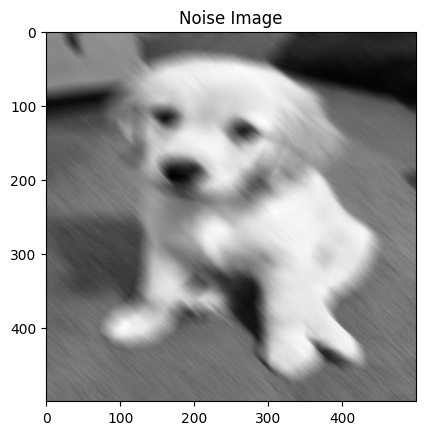

In [4]:
plt.imshow(g_img,cmap='gray')
plt.title("Noise Image")
plt.show()

#### Get an estimate for f using <br><br> (i) Wiener filter <br> (ii) using MAP estimation <br> (iii) any deep network based approach under the following cases.

In [5]:
H = np.fft.fft2(h,s=img.shape)
K = 10
H_1 = np.conj(H)
Wiener_filter = H_1/(H * H_1 + K)
G = np.fft.fft2(g_img)
filtered_img = Wiener_filter * G
filtered_img = np.fft.ifft2(filtered_img)

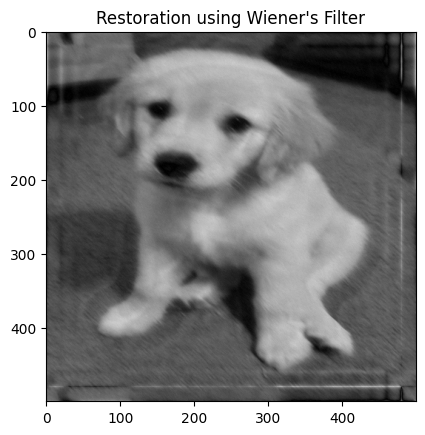

In [6]:
plt.imshow(np.abs(filtered_img),cmap='gray')
plt.title("Restoration using Wiener's Filter")
plt.show()

In [ ]:
epochs = 10
